In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

iris=load_iris()
X= iris.data[:,2:]
y= iris.target

In [9]:
tree_clf= DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file="iris_tree.dot",
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

![iris_tree](https://user-images.githubusercontent.com/13174586/62699711-cedd8800-b9fd-11e9-9f9e-e1e037224782.png)

In [11]:


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris= True, legend=False, plot_training=True):
    x1s= np.linspace(axes[0], axes[1], 100)
    x2s= np.linspace(axes[2], axes[3], 100)
    x1, x2= np.meshgrid(x1s, x2s)
    X_new= np.c_[x1.ravel(), x2.ravel()]
    y_pred= clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contourf(x1, x2, y_pred, alpha=0.8, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label='Setosa')
        plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs', label='Versicolor')
        plt.plot(X[:,0][y==2], X[:,1][y==2], 'g^', label='Virginica')
    if iris:
        plt.xlabel('Petal length')
        plt.ylabel('Petal width')
    else:
        plt.xlabel('x_1')
        plt.ylabel('x_2')
    if legend:
        plt.legend(loc='lower right')

Text(2.75,0.2,'Depth-2')

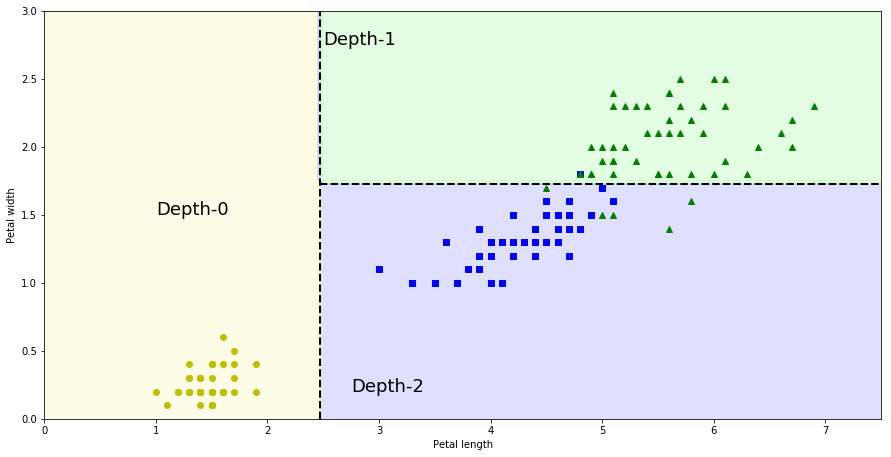

In [12]:
plt.figure(figsize=(15, 7.5))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.468,2.468], [0,3], 'k--', linewidth=2)
plt.plot([2.468,7.5], [1.73,1.73], 'k--', linewidth=2)
plt.text(1, 1.5, 'Depth-0', fontsize=18)
plt.text(2.5, 2.75, 'Depth-1', fontsize=18)
plt.text(2.75, 0.2, 'Depth-2', fontsize=18)

In [13]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [14]:
tree_clf.predict([[5, 1.5]])

array([1])

In [31]:
X[(X[:,1]==X[:,1][y==1].max()) & (y==1)]

array([[4.8, 1.8]])

In [32]:
not_widest_versicolor= (X[:,1]!=1.8) | (y==2)
X_tweaked= X[not_widest_versicolor]
y_tweaked= y[not_widest_versicolor]

In [35]:
tree_clf_tweaked= DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

Text(0.5,2,'Depth-2')

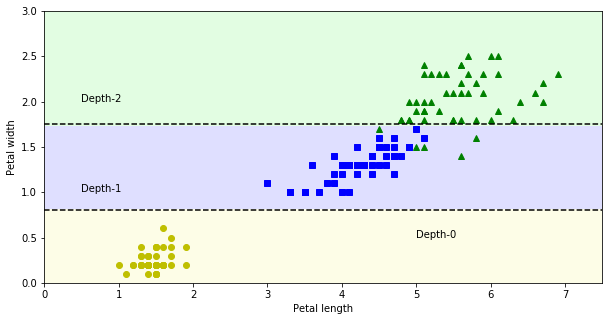

In [49]:
plt.figure(figsize=(10, 5))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [.8, .8], 'k--')
plt.plot([0, 7.5], [1.75, 1.75], 'k--')
plt.text(5, .5, 'Depth-0')
plt.text(.5, 1, 'Depth-1')
plt.text(.5, 2, 'Depth-2')

In [56]:
from sklearn.datasets import make_moons

Xm, ym= make_moons(n_samples=100, noise=0.25, random_state=50)

In [57]:
deep_tree_clf1= DecisionTreeClassifier(random_state=42)
deep_tree_clf2= DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

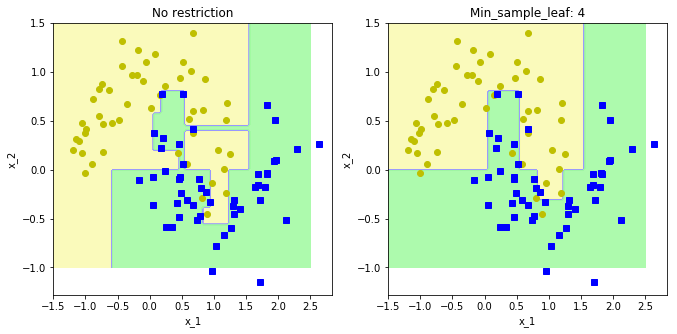

In [65]:
plt.figure(figsize=(11, 5))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title('No restriction')
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title('Min_sample_leaf: {}'.format(deep_tree_clf2.min_samples_leaf))
plt.show()

In [85]:
angle= np.pi/ 180*20
rotation_matrix=np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])

Xr= X.dot(rotation_matrix)

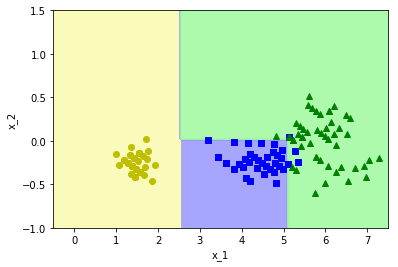

In [91]:
tree_clf_r= DecisionTreeClassifier(random_state=2)
tree_clf_r.fit(Xr, y)

plot_decision_boundary(tree_clf_r, Xr, y, axes=[-0.5, 7.5, -1, 1.5], iris=False)

In [96]:
np.random.seed(6)
Xs= np.random.rand(100, 2)-0.5
ys= (Xs[:,0]>0).astype(np.float32)*2

In [97]:
angle= np.pi/4
rotation_matrix=np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])

Xsr= Xs.dot(rotation_matrix)

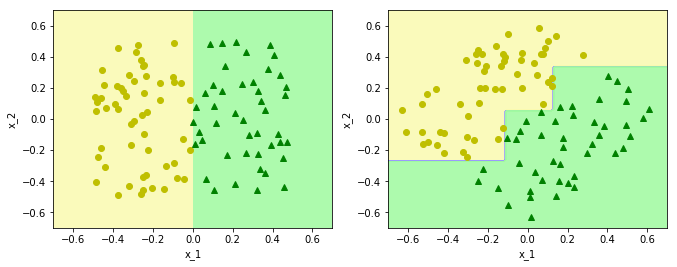

In [98]:
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

In [100]:
np.random.seed(23)
m=200
X= np.random.rand(m,1)
y= 4*(X-0.5)**2
y= y +np.random.rand(m,1)/10

In [102]:
from sklearn.tree import DecisionTreeRegressor

tree_reg= DecisionTreeRegressor(max_depth=2, random_state=12)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=12, splitter='best')

In [104]:
from sklearn.tree import export_graphviz

export_graphviz(tree_reg, out_file="reg_tree.dot",
               rounded=True,
               filled=True)

![reg_tree](https://user-images.githubusercontent.com/13174586/62771245-6accc980-baba-11e9-9ee9-02cdf9760b15.png)


In [105]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1= DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2= DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [108]:
def plot_reg_preds(tree_reg, X, y, axes=[0,1,-0.2, 1], ylabel='y'):
    x1= np.linspace(axes[0], axes[1], 500).reshape(-1,1)
    y_pred= tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel('x_1')
    if ylabel:
        plt.ylabel(ylabel)
    plt.plot(X, y, 'b.' )
    plt.plot(x1, y_pred, 'r.-', linewidth=2, label='y_pred')

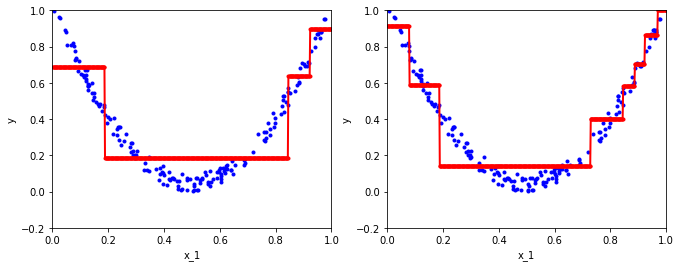

In [110]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_reg_preds(tree_reg1, X, y)

plt.subplot(122)
plot_reg_preds(tree_reg2, X, y)


In [111]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [112]:
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

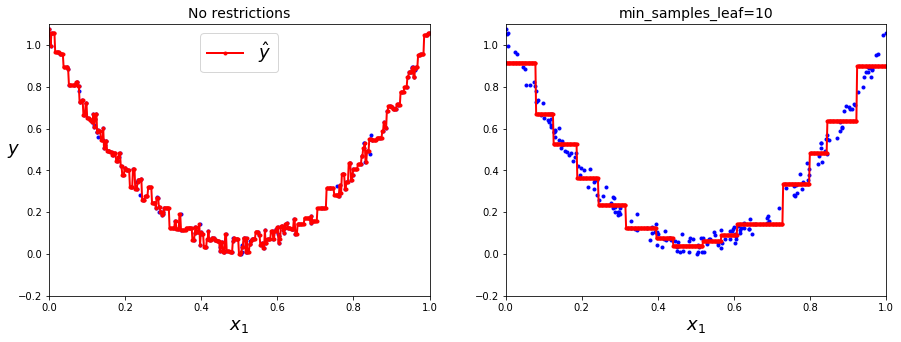

In [115]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)
plt.show()

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


X, y= make_moons(n_samples=10000, noise=0.4, random_state=12)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=12)


params= {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2,3,4]}
grid_search_cv= GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    6.3s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, v

In [118]:
grid_search_cv.best_score_

0.856125

In [119]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=23,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [121]:
y_pred= grid_search_cv.best_estimator_.predict(X_test)

In [122]:
accuracy_score(y_test, y_pred)

0.8585

In [126]:
from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone
from scipy.stats import mode


n_trees=1000
n_instances=100

mini_sets=[]

rs= ShuffleSplit(n_splits=n_trees, test_size=len(X_train)-n_instances, random_state=12)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train= X_train[mini_train_index]
    y_mini_train= y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [127]:
forest= [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores=[]

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred= tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

0.789354

In [130]:
Y_pred= np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index]= tree.predict(X_test)

In [131]:
y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [132]:

accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.8655